First, let's display the daily and weekly data on graphs to make visually inspecting the data easier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    btc_data_daily = pd.read_csv('..\\data\\bitcoin_ohlc_daily.csv')
    btc_data_weekly = pd.read_csv('..\\data\\bitcoin_ohlc_weekly.csv')
    reddit_data_daily = pd.read_csv('..\\data\\reddit_comments_daily.csv').dropna(how='any')
    reddit_data_weekly = pd.read_csv('..\\data\\reddit_comments_weekly.csv').dropna(how='any')

    btc_data_daily_start = btc_data_daily['period_start_utc'].describe()['min']
    btc_data_daily_end = btc_data_daily['period_start_utc'].describe()['max']
    btc_data_weekly_start = btc_data_weekly['period_start_utc'].describe()['min']
    btc_data_weekly_end = btc_data_weekly['period_start_utc'].describe()['max']

    reddit_data_daily_start = reddit_data_daily['period_start_utc'].describe()['min']
    reddit_data_daily_end = reddit_data_daily['period_start_utc'].describe()['max']
    reddit_data_weekly_start = reddit_data_weekly['period_start_utc'].describe()['min']
    reddit_data_weekly_end = reddit_data_weekly['period_start_utc'].describe()['max']

    btc_data_daily = btc_data_daily.loc[(btc_data_daily['period_start_utc'] >= max(btc_data_daily_start, reddit_data_daily_start)) & (btc_data_daily['period_start_utc'] <= min(btc_data_daily_end, reddit_data_daily_end))]
    btc_data_weekly = btc_data_weekly.loc[(btc_data_weekly['period_start_utc'] >= max(btc_data_weekly_start, reddit_data_weekly_start)) & (btc_data_weekly['period_start_utc'] <= min(btc_data_weekly_end, reddit_data_weekly_end))]
    reddit_data_daily = reddit_data_daily.loc[(reddit_data_daily['period_start_utc'] >= max(btc_data_daily_start, reddit_data_daily_start)) & (reddit_data_daily['period_start_utc'] <= min(btc_data_daily_end, reddit_data_daily_end))]
    reddit_data_weekly = reddit_data_weekly.loc[(reddit_data_weekly['period_start_utc'] >= max(btc_data_weekly_start, reddit_data_weekly_start)) & (reddit_data_weekly['period_start_utc'] <= min(btc_data_weekly_end, reddit_data_weekly_end))]
        
    reddit_data_daily['min_score'] = reddit_data_daily['min_score'].apply(lambda x: -x)
    reddit_data_weekly['min_score'] = reddit_data_weekly['min_score'].apply(lambda x: -x)
except:
    print("Run the data engineering scripts to create the data")

In [2]:
btc_data_daily['period_start_utc'].iat[1]

1325462400.0

In [3]:
reddit_data_daily['period_start_utc'].iat[1]

1325462400

Let's visualize the weekly data.

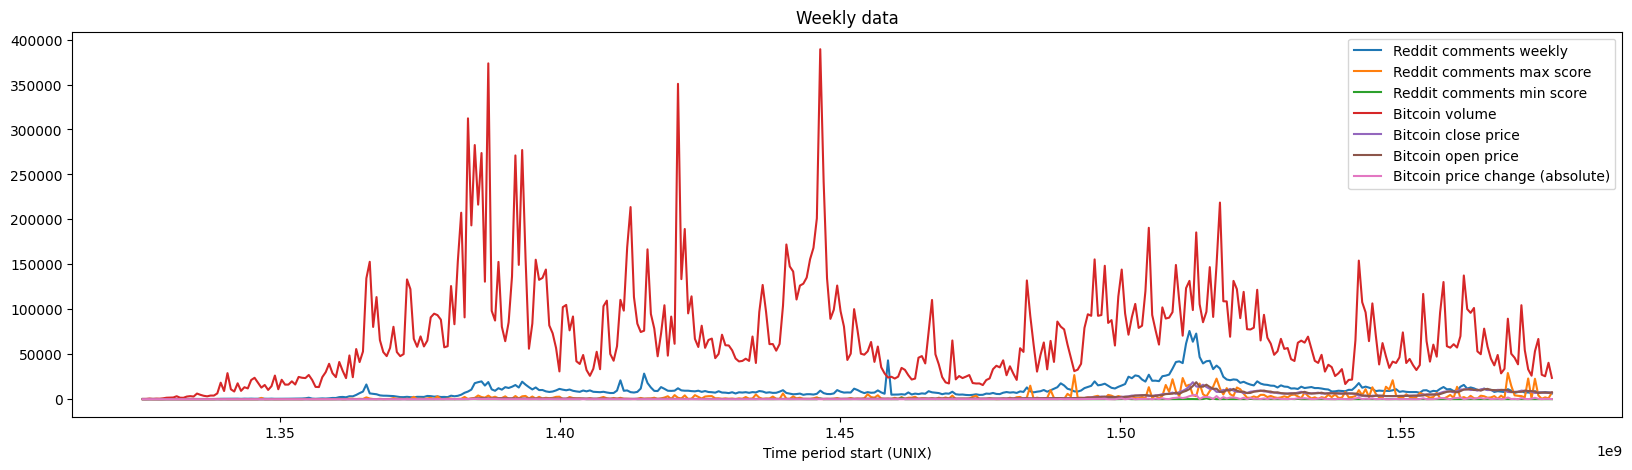

In [4]:
def draw_data(reddit_data, btc_data, reddit_data_points=['volume', 'max_score', 'min_score'], btc_data_points=['volume', 'close', 'open', 'change_abs'], title='Weekly data'):
    graph = reddit_data.plot(x='period_start_utc', y=reddit_data_points[0], title=title, xlabel='Time period start (UNIX)', ylabel='', figsize=(20,5))
    for r_data in reddit_data_points[1:]:
        reddit_data.plot(x='period_start_utc', y=r_data, title=title, xlabel='Time period start (UNIX)', ylabel='', ax=graph)

    for b_data in btc_data_points:
        btc_data.plot(x='period_start_utc', y=b_data, title=title, xlabel='Time period start (UNIX)', ylabel='', ax=graph)
    return graph

graph = draw_data(reddit_data_weekly, btc_data_weekly)
graph.legend(['Reddit comments weekly', 'Reddit comments max score', 'Reddit comments min score', 'Bitcoin volume', 'Bitcoin close price', 'Bitcoin open price', 'Bitcoin price change (absolute)'])

While some interesting things can already be seen from this graph, normalizing the data to a similar scale helps better compare the data. To do this, both data points will be normalized to a scale of 0% - 100% (100% means the max value of the data point in our timeframe)

Will also remove the btc_close data point as it is pretty similar to btc_open data point

In [5]:
btc_describe = btc_data_weekly.describe()
reddit_describe = reddit_data_weekly.describe()

btc_data_weekly_normalized = btc_data_weekly.apply(lambda x: x if x.name == 'period_start_utc' else 100 / btc_describe[x.name]['max'] * x)
reddit_data_weekly_normalized = reddit_data_weekly.apply(lambda x: x if x.name == 'period_start_utc' else 100 / reddit_describe[x.name]['max'] * x)

C:\Users\Brait\AppData\Local\Temp\ipykernel_11468\288155913.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  btc_data_weekly_normalized = btc_data_weekly.apply(lambda x: x if x.name == 'period_start_utc' else 100 / btc_describe[x.name]['max'] * x)
C:\Users\Brait\AppData\Local\Temp\ipykernel_11468\288155913.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  reddit_data_weekly_normalized = reddit_data_weekly.apply(lambda x: x if x.name == 'period_start_utc' else 100 / reddit_describe[x.name]['max'] * x)


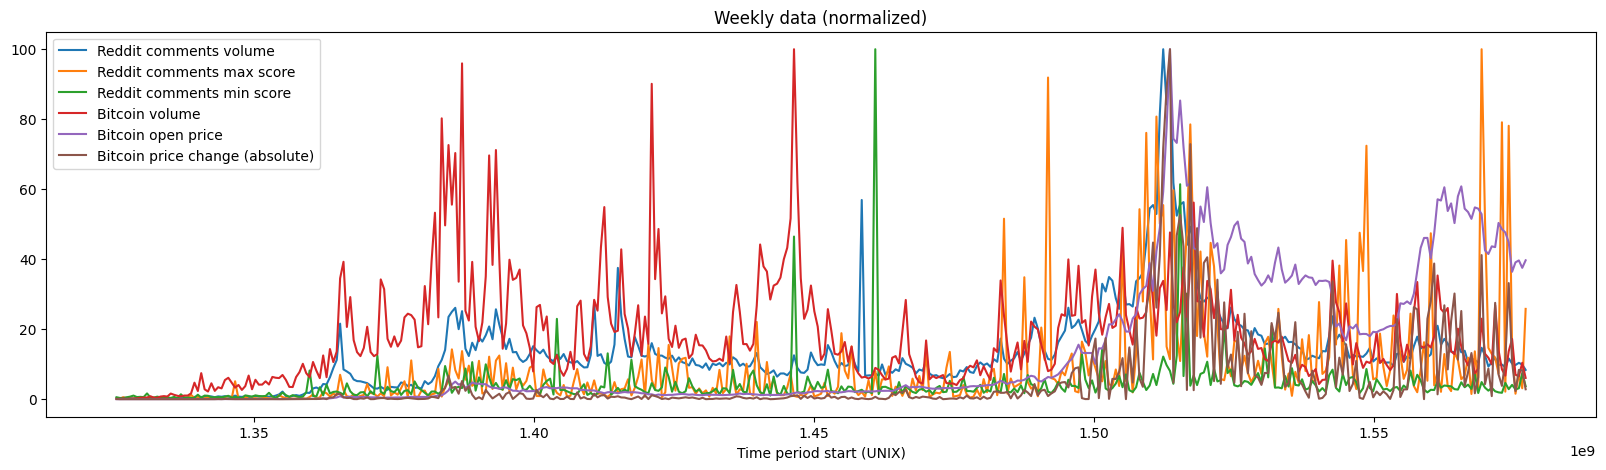

In [6]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, btc_data_points=['volume', 'open', 'change_abs'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Reddit comments max score', 'Reddit comments min score', 'Bitcoin volume', 'Bitcoin open price', 'Bitcoin price change (absolute)'])

Since the graph currently has 5 different data points at once, then it is quite complicated to actually read it. Let's create graphs that allows us to compare a few data points at once.

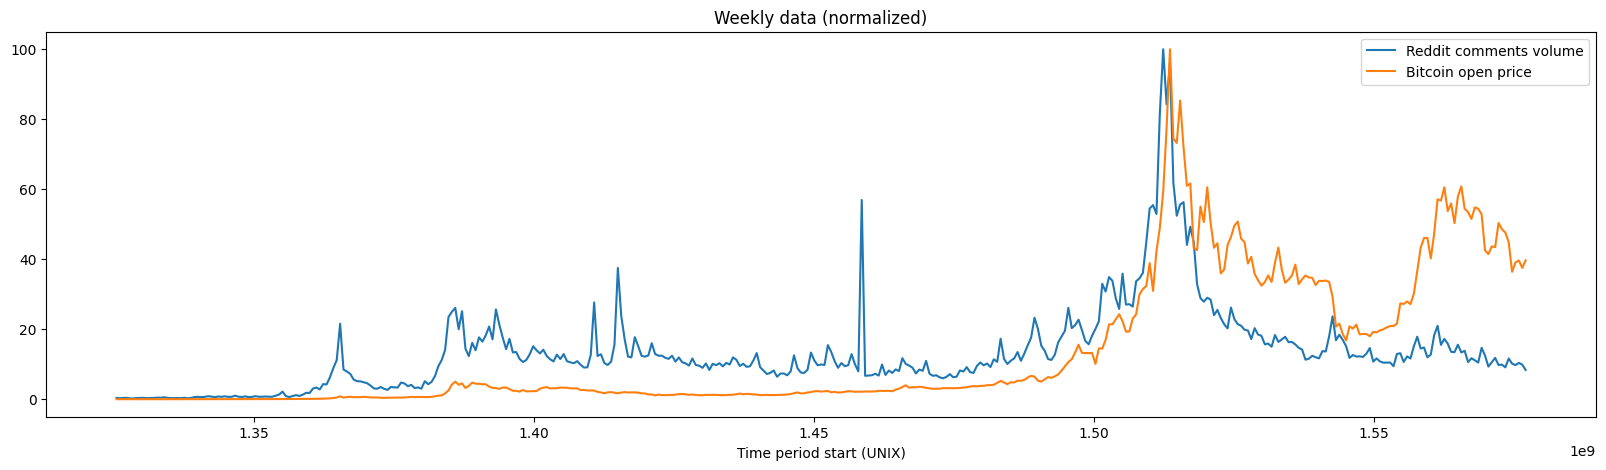

In [7]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['volume'], btc_data_points=['open'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Bitcoin open price'])

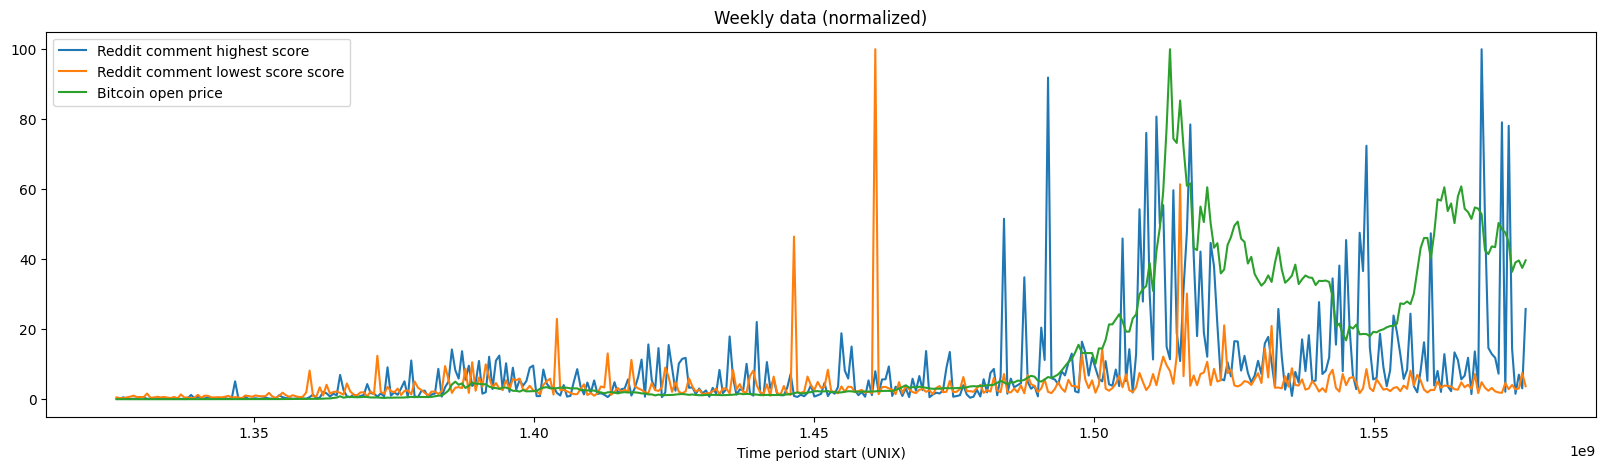

In [8]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['max_score', 'min_score'], btc_data_points=['open'], title='Weekly data (normalized)')
graph.legend(['Reddit comment highest score', 'Reddit comment lowest score score', 'Bitcoin open price'])

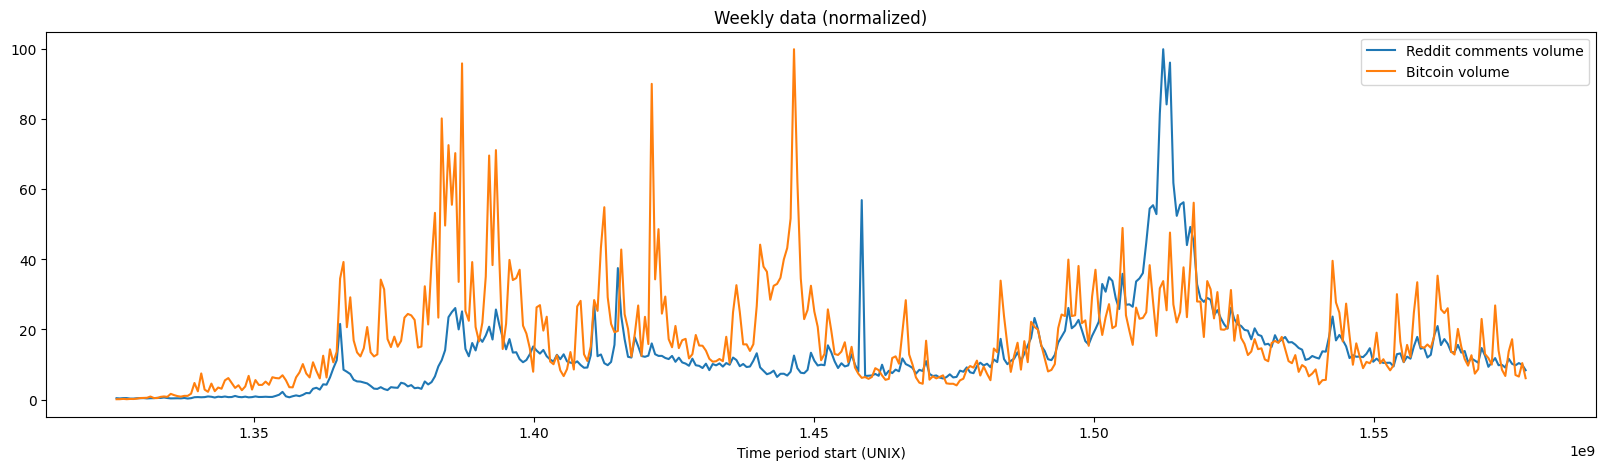

In [9]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['volume'], btc_data_points=['volume'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Bitcoin volume'])

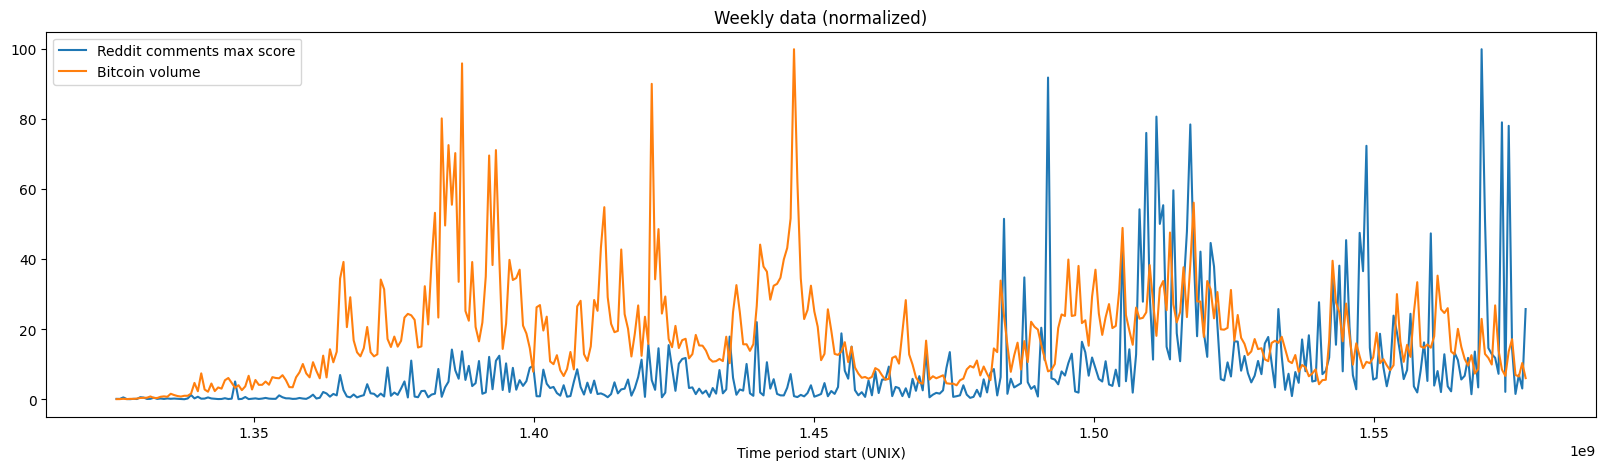

In [10]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['max_score'], btc_data_points=['volume'], title='Weekly data (normalized)')
graph.legend(['Reddit comments max score', 'Bitcoin volume'])

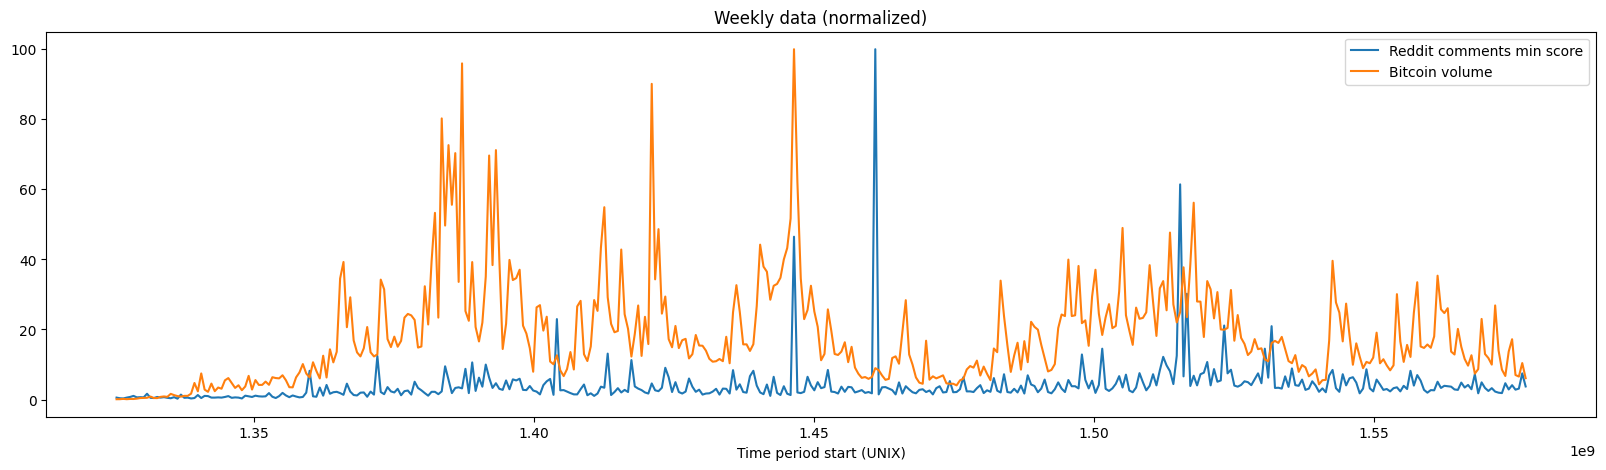

In [11]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['min_score'], btc_data_points=['volume'], title='Weekly data (normalized)')
graph.legend(['Reddit comments min score', 'Bitcoin volume'])

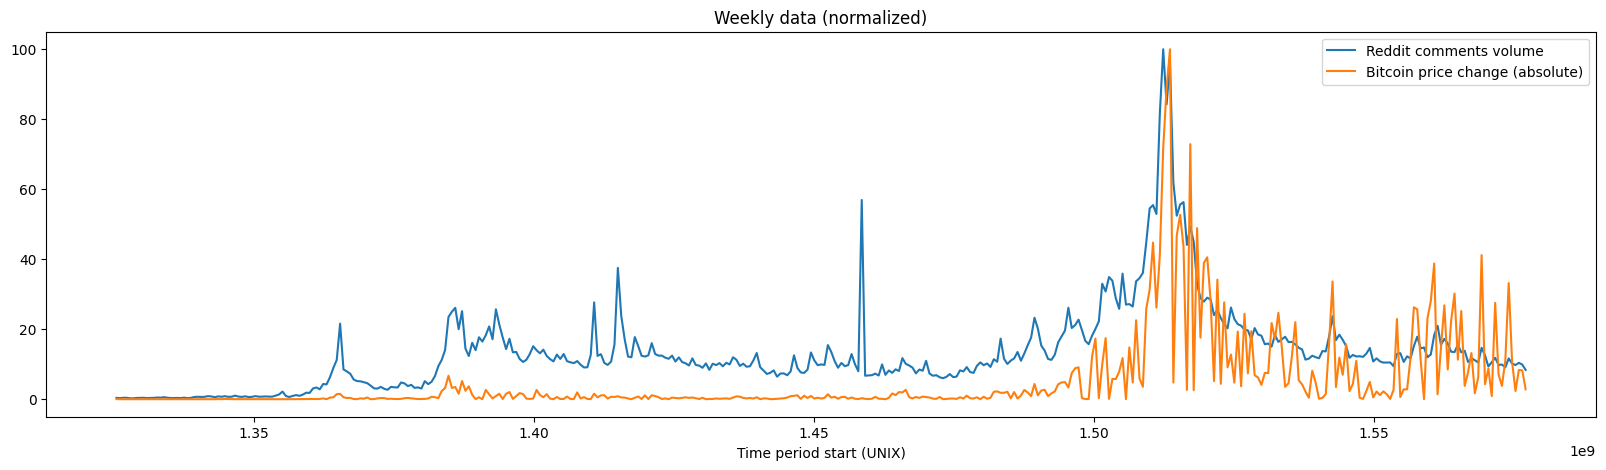

In [12]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['volume'], btc_data_points=['change_abs'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Bitcoin price change (absolute)'])

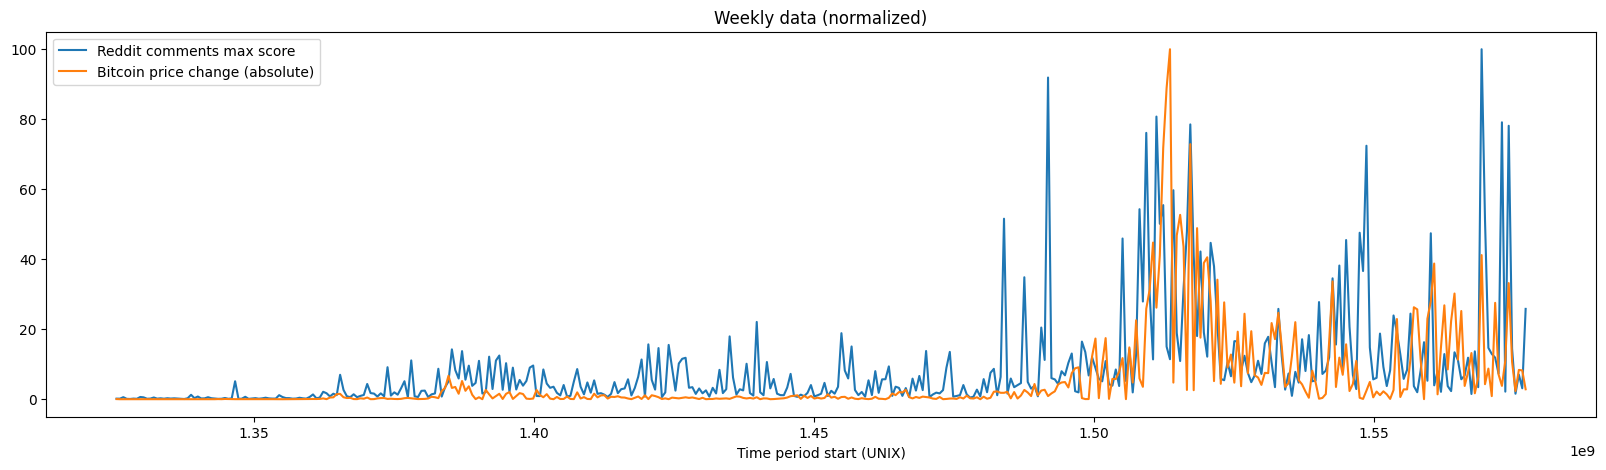

In [13]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['max_score'], btc_data_points=['change_abs'], title='Weekly data (normalized)')
graph.legend(['Reddit comments max score', 'Bitcoin price change (absolute)'])

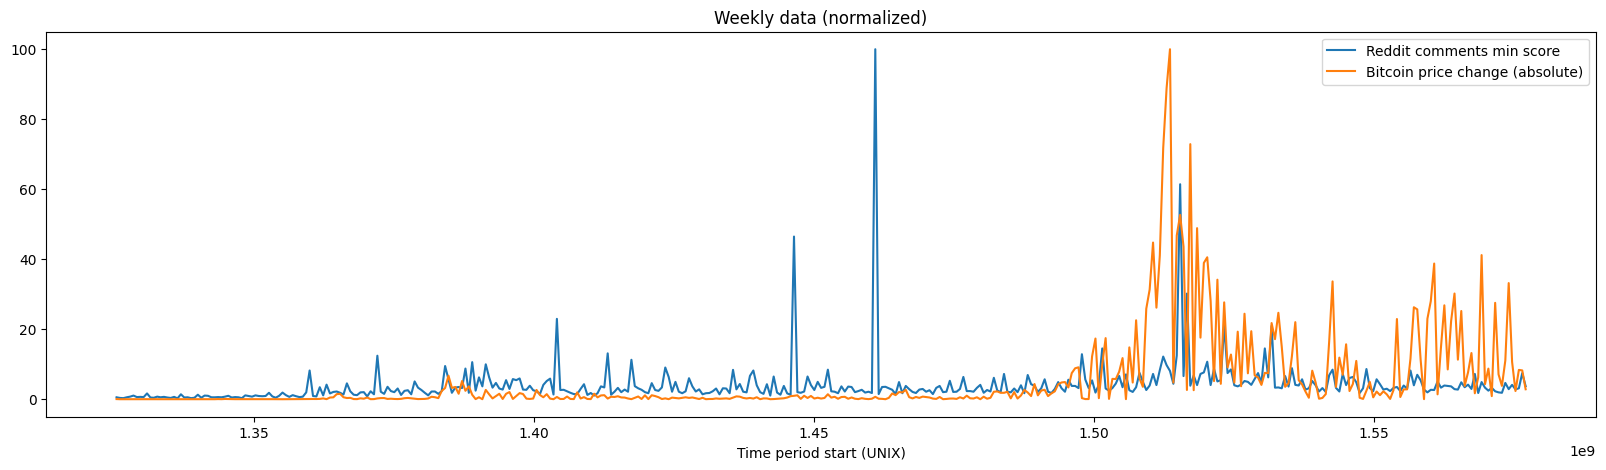

In [14]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['min_score'], btc_data_points=['change_abs'], title='Weekly data (normalized)')
graph.legend(['Reddit comments min score', 'Bitcoin price change (absolute)'])

Lets also calculate the correlations between the data points

In [15]:
merged_data = reddit_data_weekly.merge(btc_data_weekly, how='inner', on=['period_start_utc'])
merged_data.corr()

,Unnamed: 0_x,period_start_utc,volume_x,max_score,min_score,avg_score,median_score,Unnamed: 0_y,volume_y,open,high,low,close,change,change_abs
Unnamed: 0_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period_start_utc,NaN,1.000000,0.445565,0.444685,0.189098,0.605984,-0.210266,NaN,0.078282,0.754248,0.743135,0.773585,0.755776,0.015085,0.435640
volume_x,NaN,0.445565,1.000000,0.461043,0.258398,0.378779,-0.245382,NaN,0.405160,0.615948,0.649811,0.583653,0.628712,0.078625,0.720365
max_score,NaN,0.444685,0.461043,1.000000,0.103523,0.782739,-0.135006,NaN,0.137961,0.478189,0.480179,0.462892,0.465040,-0.071725,0.422141
min_score,NaN,0.189098,0.258398,0.103523,1.000000,0.141900,-0.157967,NaN,0.174588,0.228533,0.226983,0.218350,0.223452,-0.027352,0.212242
avg_score,NaN,0.605984,0.378779,0.782739,0.141900,1.000000,0.010533,NaN,0.104972,0.577116,0.569291,0.571702,0.564217,-0.069455,0.415714
median_score,NaN,-0.210266,-0.245382,-0.135006,-0.157967,0.010533,1.000000,NaN,-0.242958,-0.177767,-0.175578,-0.173314,-0.173947,0.020517,-0.137515
Unnamed: 0_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volume_y,NaN,0.078282,0.405160,0.137961,0.174588,0.104972,-0.242958,NaN,1.000000,0.089279,0.104503,0.055719,0.080853,-0.047767,0.210318
open,NaN,0.754248,0.615948,0.478189,0.228533,0.577116,-0.177767,NaN,0.089279,1.000000,0.992902,0.989048,0.984896,-0.078629,0.725556


From the correlations table we can see that the following paramaters are over or under 0.5 (meaning that they could be considered as correlated)

Reddit comment volume - bitcoin price (ohlc) </br>
Reddit comment volume - bitcoin price absolute change </br>
Reddit comment avg score - bitcoin price (ohlc) </br>

The normalized graphs for these correlations are the following

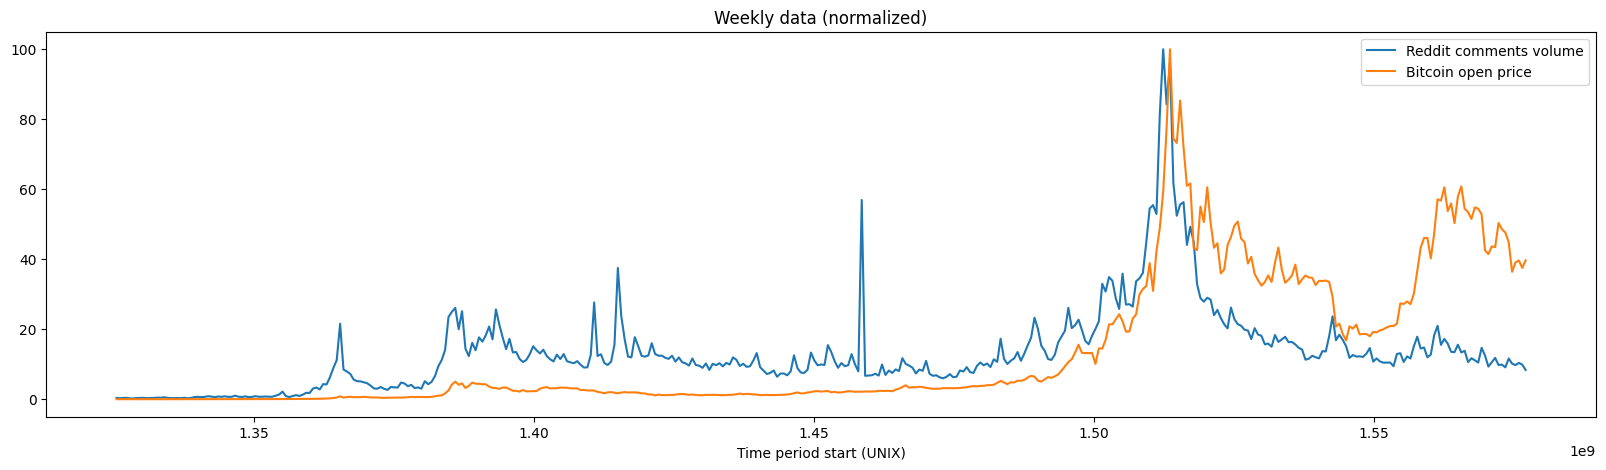

In [16]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['volume'], btc_data_points=['open'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Bitcoin open price'])

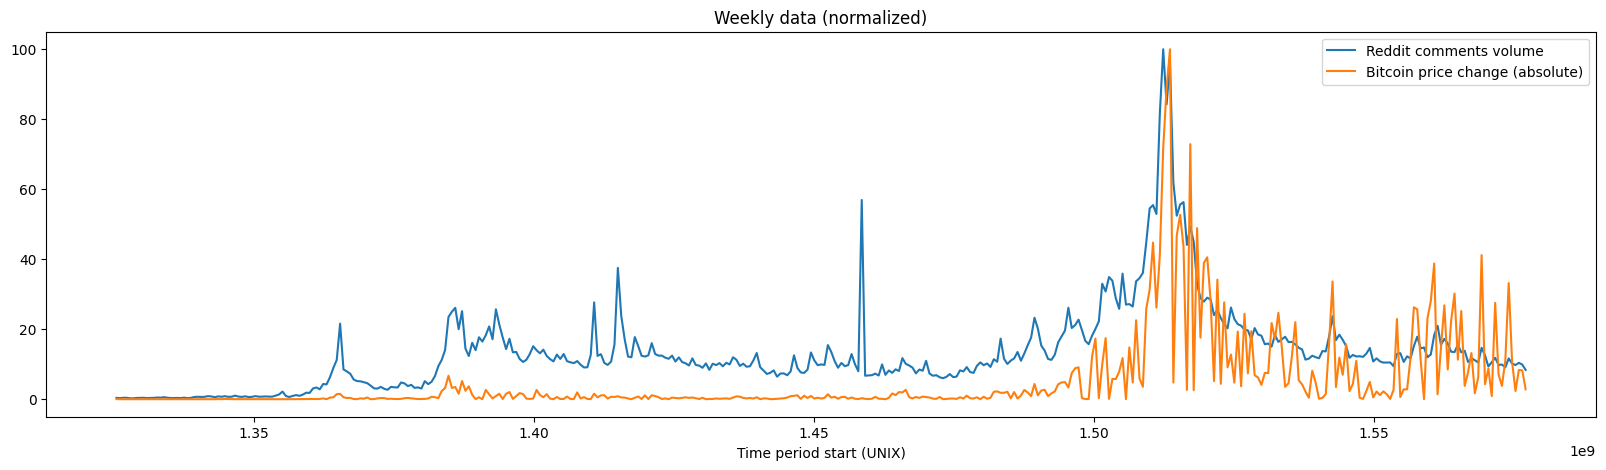

In [17]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['volume'], btc_data_points=['change_abs'], title='Weekly data (normalized)')
graph.legend(['Reddit comments volume', 'Bitcoin price change (absolute)'])

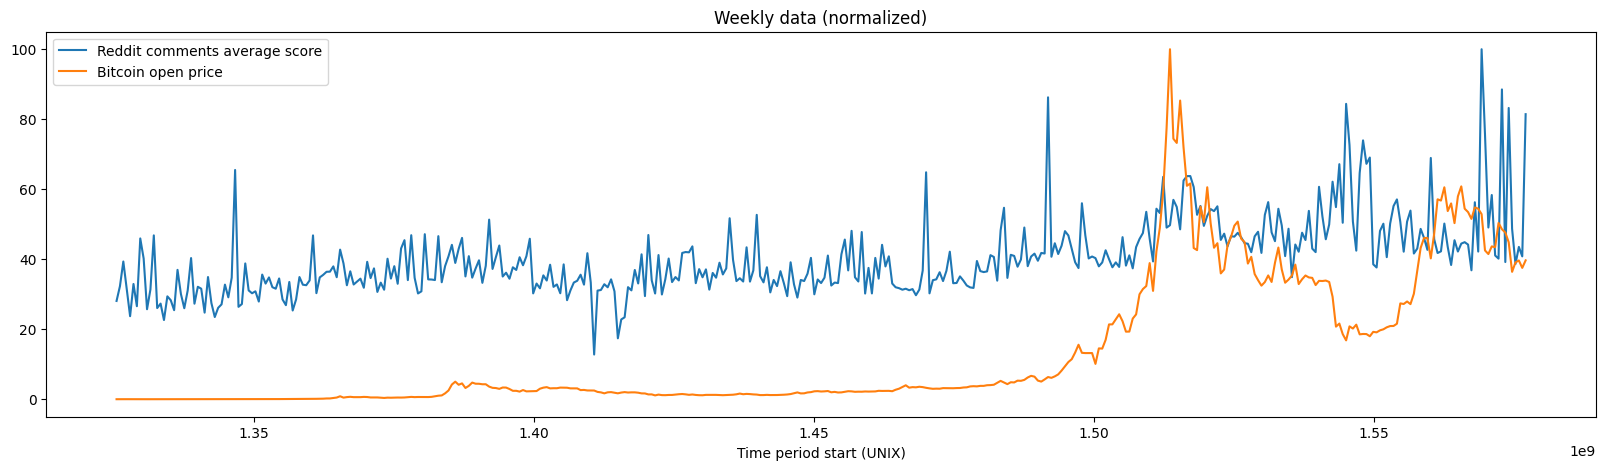

In [18]:
graph = draw_data(reddit_data_weekly_normalized, btc_data_weekly_normalized, reddit_data_points=['avg_score'], btc_data_points=['open'], title='Weekly data (normalized)')
graph.legend(['Reddit comments average score', 'Bitcoin open price'])